# Hypotheses 1 A,B,C

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
sns.set_context("talk")


## Exclusions and Outliers
-- 3 subject sub-5f706a963b6ac2627a4bb3b5 & sub-611c31c77df20ecc6881cc44 reported 0 variance distributions

In [2]:
sub_df=[]
subs=os.listdir('../bids')
exclude=[]
for sub in subs:
    #print(sub)
    if sub not in['subjects.tsv']:#,'sub-5f706a963b6ac2627a4bb3b5','sub-611c31c77df20ecc6881cc44',
                 #'sub-5d8aa95dd06260000179442b']:#reported 0 variance distributions
        mem=pd.read_csv('../bids/%s/%s_mem-report.tsv'%(sub,sub),sep='\t')
        mem['value']=pd.to_numeric(mem['value'])
        
        
        mem.loc[mem['value'] < 0, 'value'] = 0
        
        mem=pd.DataFrame(mem.values.repeat(mem.value, axis=0), columns=mem.columns)
        mem.percent=pd.to_numeric(mem.percent)
        mem['value']=pd.to_numeric(mem['value'])
        mem['order']=pd.to_numeric(mem['order'])
        mem=mem[['dist','percent','value','order']]
        O_df=mem.groupby('dist').mean().reset_index()
        order_var=O_df[O_df['dist']=='wide']['order'].values-O_df[O_df['dist']=='narrow']['order'].values
        if len(mem.groupby('dist').mean())>2:
            mem_df=pd.DataFrame()
            mem_df['dist']=['narrow','skew','wide']
            mem_df['narrow_first']=order_var[0]
            mem_df['means']=mem.groupby('dist').mean()['percent'].values
            mem_df['stds']=mem.groupby('dist').std()['percent'].values
            mem_df['skew']=mem.groupby('dist').skew()['percent'].values
            mem_df['sub']=(sub)
            sub_df.append(mem_df)
            if any(mem_df['stds']==0):
                exclude.append(sub)
                
            
        else:
            #print(sub)
            pass
sub_df=pd.concat(sub_df)
sub_df=sub_df.reset_index()
#sub_df=sub_df[~sub_df['sub'].isin(exclude)]
sub_df.head()
print(len(exclude))

18


In [3]:
import statsmodels.api as sm
row=[]
for sub in sub_df['sub'].unique():
    df=pd.read_csv('../bids/%s/%s_task-amb_run-1_events.tsv'%(sub,sub),
                   sep='\t')
    #if any(df[df['choice']=='Ambiguity']['per']==100):
    #    exclude.append(sub)
    #elif any(df[df['choice']=='risk']['per']==0):
    #    exclude.append(sub)


In [4]:
print("Out of %s participants an additional %s were excluded do to choice checks"%(len(
    sub_df['sub'].unique()),len(exclude)))
print("This leaves us with a total of %s"%(len(
    sub_df['sub'].unique())-len(exclude)))

Out of 296 participants an additional 18 were excluded do to choice checks
This leaves us with a total of 278


## Manipulation Check
Notes:
- Some negative frequencies were reported were making them 0
- Some reports were not filled for all distributions


In [5]:
sub_df=sub_df[~sub_df['sub'].isin(exclude)]
len(sub_df['sub'].unique())

278

Testing if wide distributions were reported with greater deviationthan narrow distributions 
 t: -15.79855806378858 p: 1.583810252892883e-40


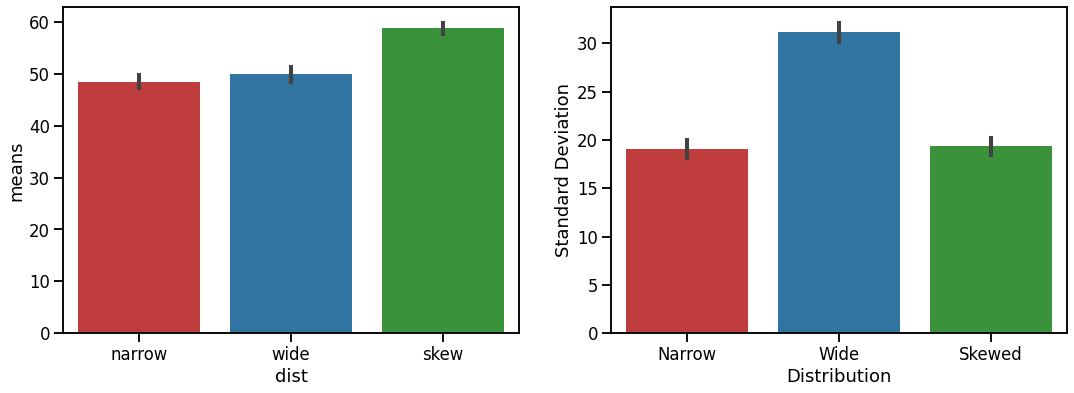

In [6]:
from scipy.stats import ttest_rel
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x='dist',y='means',data=sub_df, ax=ax[0],order=['narrow','wide','skew'],
            palette=['tab:red','tab:blue','tab:green'],)
plt.ylabel('Mean of Reported Distribution')
ax=sns.barplot(x='dist',y='stds',data=sub_df, ax=ax[1],order=['narrow','wide','skew'],
           palette=['tab:red','tab:blue','tab:green'])
plt.xlabel('Distribution')
ax.set_xticklabels(['Narrow','Wide','Skewed'], minor=False)
plt.ylabel('Standard Deviation')
#sns.barplot(x='dist',y='skew',data=sub_df, ax=ax[2])
t,p=ttest_rel(sub_df[sub_df['dist']=='narrow']['stds'],
              sub_df[sub_df['dist']=='wide']['stds'])

print("Testing if wide distributions were reported with greater deviation"+
      "than narrow distributions \n t: %s p: %s"
     %(t,p))

plt.show()

In [7]:
sub_df

,index,dist,narrow_first,means,stds,skew,sub
0,0,narrow,-1.0,50.000000,33.166248,0.000000,sub-5858b2ca83a02d0001e38fd2
1,1,skew,-1.0,71.764706,14.677915,-0.209272,sub-5858b2ca83a02d0001e38fd2
2,2,wide,-1.0,48.000000,36.292463,0.123724,sub-5858b2ca83a02d0001e38fd2
3,0,narrow,-1.0,59.166667,19.286516,0.505403,sub-5c7e764fa7432a00169e1499
4,1,skew,-1.0,47.058824,27.102746,-0.458493,sub-5c7e764fa7432a00169e1499
...,...,...,...,...,...,...,...
883,1,skew,-1.0,68.000000,15.491933,0.412401,sub-5fea025ffeba314a5f1fbda8
884,2,wide,-1.0,50.000000,32.366944,0.000000,sub-5fea025ffeba314a5f1fbda8
885,0,narrow,1.0,51.538462,36.601586,-0.068506,sub-614fca8245a450546842e487
886,1,skew,1.0,68.947368,22.581885,-1.439625,sub-614fca8245a450546842e487


In [8]:
sub_df['Experiment']=2
sub_df.to_csv('Belief_df_E2.csv')

0
1
2
3
4
5


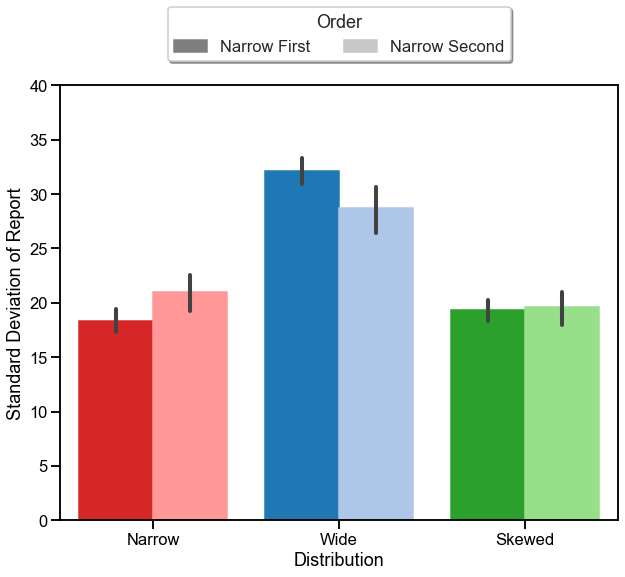

In [9]:
plt_df=sub_df.copy()
plt_df['Order']=plt_df['narrow_first']<0
fig, ax = plt.subplots(1,figsize=(10, 8))

sns.set_context("talk")
sns.set_style("white")
ax=sns.barplot(x='dist',y='stds',ax=ax,data=plt_df,hue='Order',order=['narrow','wide','skew'])
for x,bar in enumerate(ax.patches):
    if x==0:
        print(x)
        bar.set_color(plt.cm.tab10(3))
    if x==1:
        print(x)
        bar.set_color(plt.cm.tab10(0))
    if x==2:
        print(x)
        bar.set_color(plt.cm.tab10(2))
    if x==3:
        print(x)
        bar.set_color(plt.cm.tab20(x%3+7))
    if x==4:
        print(x)
        bar.set_color(plt.cm.tab20(x%3))
    if x==5:
        print(x)
        bar.set_color(plt.cm.tab20(x%3+3))
colors = {'Narrow First':plt.cm.tab20(14), 'Narrow Second':plt.cm.tab20(15)}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles=handles,labels = labels,title='Order',loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=2, fancybox=True, shadow=True)
plt.xlabel('Distribution')
ax.set_xticklabels(['Narrow','Wide','Skewed'], minor=False)
plt.ylabel('Standard Deviation of Report')
plt.ylim(0, 40) 
plt.show()

1= wide after narrow
-1= wide before narrow

0
1
2
3


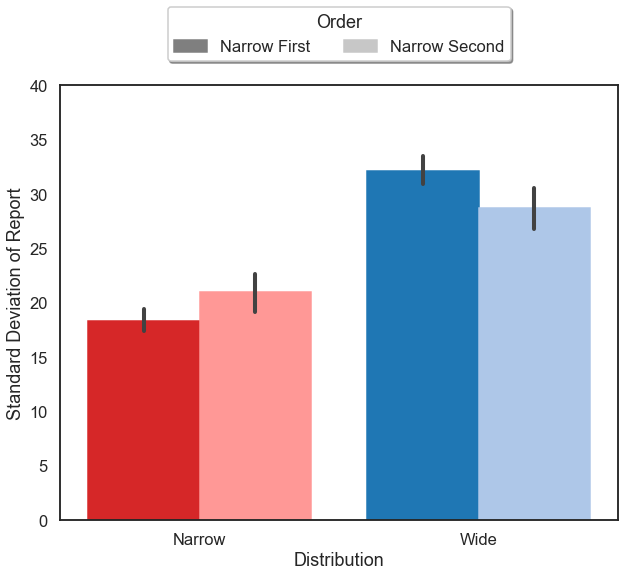

Test for order effects on wide t: -2.9340356694378493 p: 0.003922165109348193 
Test for order effects on narrow t: 2.6200925953151875 p: 0.009778523469093083 


In [10]:
from scipy.stats import ttest_ind

import matplotlib.colors

plt_df=sub_df.copy()
plt_df['Order']=plt_df['narrow_first']<0
fig, ax = plt.subplots(1,figsize=(10, 8))

sns.set_context("talk")
sns.set_style("white")
ax=sns.barplot(x='dist',y='stds',ax=ax,data=plt_df,hue='Order',order=['narrow','wide'])
for x,bar in enumerate(ax.patches):
    if x==0:
        print(x)
        bar.set_color(plt.cm.tab10(3))
    if x==1:
        print(x)
        bar.set_color(plt.cm.tab10(0))
    if x==2:
        print(x)
        bar.set_color(plt.cm.tab20(7))
    if x==3:
        print(x)
        bar.set_color(plt.cm.tab20(1))

colors = {'Narrow First':plt.cm.tab20(14), 'Narrow Second':plt.cm.tab20(15)}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles=handles,labels = labels,title='Order',loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=2, fancybox=True, shadow=True)
plt.xlabel('Distribution')
ax.set_xticklabels(['Narrow','Wide'], minor=False)
plt.ylabel('Standard Deviation of Report')
plt.ylim(0, 40) 
plt.show()

group1 = plt_df[(plt_df['narrow_first']==-1)&(plt_df['dist']=='wide')]
group2 = plt_df[~(plt_df['narrow_first']==-1)&(plt_df['dist']=='wide')]
t,p=ttest_ind(group1['stds'], group2['stds'],equal_var=False)
print("Test for order effects on wide t: %s p: %s "%(t,p))

group1 = plt_df[(plt_df['narrow_first']==-1)&(plt_df['dist']=='narrow')]
group2 = plt_df[~(plt_df['narrow_first']==-1)&(plt_df['dist']=='narrow')]
t,p=ttest_ind(group1['stds'], group2['stds'],equal_var=False)
print("Test for order effects on narrow t: %s p: %s "%(t,p))


In [11]:
len(group1)+len(group2)


278

In [12]:
print(len(group1)+len(group2)-2)

276


# Hypothesis 1A:
- During the ambiguous decision task, participants will be more averse to ambiguous lotteries which were associated with a high compared to low variance in the probabilities, learned during a prior risky decision task. 
- Choice ~ Probability + distri|bution [‘wide’, ‘narrow’] + (1|sub) 

In [13]:
amb_df=[]
for sub in sub_df['sub'].unique():
        amb=pd.read_csv('../bids/%s/%s_task-amb_run-1_events.tsv'%(sub,sub),sep='\t')
        amb['sub']=sub
        amb['order']=sub_df[sub_df['sub']==sub]['narrow_first']
        amb_df.append(amb)
amb_df=pd.concat(amb_df)

print("no NA values for choice ",amb_df['choice'].unique())
amb_df['choose_risk']=amb_df['choice']=='risk'
print("no NA values for Amb ",amb_df['Amb'].unique())
amb_df['full_A']=amb_df['Amb']=='[0,1]'
print("no NA values for dist ",amb_df['dist'].unique())
amb_df['wide_dist']=amb_df['dist']=='wide'


amb_df.head()


no NA values for choice  ['risk' 'Ambiguous' nan]
no NA values for Amb  ['[0.25,0.75]' '[0,1]' nan]
no NA values for dist  ['wide' 'narrow' 'skew' nan]


,Blocktype,tnum,rt,color,per,Amb,choice,dist,side,response,sub,order,choose_risk,full_A,wide_dist
0,Ambiguity,0.0,1666.0,blue,0.50,"[0.25,0.75]",risk,wide,right,j,sub-5858b2ca83a02d0001e38fd2,-1.0,True,False,True
1,Ambiguity,1.0,2371.0,blue,0.41,"[0.25,0.75]",Ambiguous,wide,right,f,sub-5858b2ca83a02d0001e38fd2,-1.0,False,False,True
2,Ambiguity,2.0,1480.0,blue,0.46,"[0.25,0.75]",risk,wide,left,f,sub-5858b2ca83a02d0001e38fd2,-1.0,True,False,True
3,Ambiguity,3.0,1457.0,blue,0.42,"[0.25,0.75]",Ambiguous,wide,right,f,sub-5858b2ca83a02d0001e38fd2,NaN,False,False,True
4,Ambiguity,4.0,1914.0,blue,0.43,"[0.25,0.75]",Ambiguous,wide,right,f,sub-5858b2ca83a02d0001e38fd2,NaN,False,False,True


In [16]:
from pymer4.models import Lmer
#model_df=amb_df[amb_df['full_A']==True].reset_index(drop=True)
model_df=amb_df
model_df=model_df[model_df['dist'].isin(['narrow','wide'])]

model = Lmer("choose_risk  ~ dist*full_A + (per|sub)",
             data=model_df, family = 'binomial')
#model.fit()
#display(model.summary())

display(model.fit(factors={"full_A": ["True", "False"],"wide_dist":["True","False"]}))


Formula: choose_risk~dist*full_A+(per|sub)

Family: binomial	 Inference: parametric

Number of observations: 16510	 Groups: {'sub': 276.0}

Log-likelihood: -9812.299 	 AIC: 19638.598

Random effects:

            Name       Var     Std
sub  (Intercept)   419.917  20.492
sub          per  1696.766  41.192

             IV1  IV2   Corr
sub  (Intercept)  per -0.997

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),0.498,0.250,0.746,0.127,1.645,1.284,2.109,0.622,0.562,0.678,3.930,0.000,***
distwide,-0.258,-0.367,-0.150,0.055,0.772,0.693,0.861,0.436,0.409,0.463,-4.671,0.000,***
full_A1,-0.298,-0.402,-0.193,0.053,0.743,0.669,0.824,0.426,0.401,0.452,-5.578,0.000,***
distwide:full_A1,0.136,-0.010,0.282,0.075,1.146,0.990,1.326,0.534,0.497,0.570,1.825,0.068,.


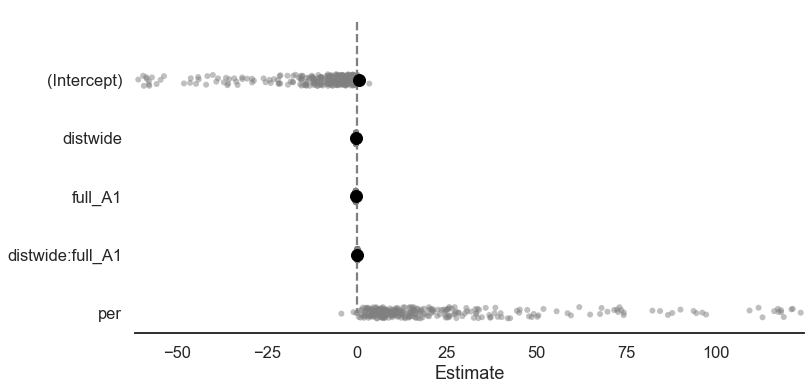

In [17]:
model.plot_summary()
plt.show()

In [18]:
subs=[]
for sub in model_df['sub'].unique():
    if len(model_df[(model_df['sub']==sub)&(model_df['dist']=='wide')])>0:
           if len(model_df[(model_df['sub']==sub)&(model_df['dist']=='narrow')])>0:
                  subs.append(sub)
subs

['sub-5858b2ca83a02d0001e38fd2',
 'sub-5c7e764fa7432a00169e1499',
 'sub-5fb16308dc5973607fa3041c',
 'sub-60e5eceb989f38c746723024',
 'sub-5dcc27974b54778b69e62ec5',
 'sub-5c5cd939a1ff0d0001176b6e',
 'sub-5a0efb83ab721b0001ef8509',
 'sub-5e3360a4499e7932901951cb',
 'sub-5dd35813794e103649612ffd',
 'sub-639e0331bc3cc615f5a3dd89',
 'sub-5e2b74daae56b71b9d24d89b',
 'sub-5f8ac3760d1aa703601582ef',
 'sub-59c86f966a287600011c393e',
 'sub-5c365b5e8821900001b3876c',
 'sub-5c872cded9fe700001024123',
 'sub-62d3864d8929960c0bd35335',
 'sub-6310a8e72d2a091bb08a0c97',
 'sub-5f1e20e5499c5d7c27d24658',
 'sub-56ad40ce5ea7aa000cbe1947',
 'sub-5e16c978783225c8108ef055',
 'sub-5f852dee17ab6c2136ac62e4',
 'sub-5de9938dad51830cad0ea9f9',
 'sub-6159d4026fd4e22c9f1179c1',
 'sub-63d83ae132a2e28694dd8431',
 'sub-6413657d35d13ae4a6c8a26f',
 'sub-608f2bae0ee0a74455533e4c',
 'sub-5ed559e5afbd830e2117ed55',
 'sub-5c4d5328889752000156a11d',
 'sub-64467092479723cb7906e371',
 'sub-5ecff126aa853e08a8f95e5b',
 'sub-5f5e

In [19]:
from scipy.stats import chisquare
model_df['full_A1']=model_df['full_A']
model_df['distwide']=model_df['wide_dist']
model_df['per:full_A1']=model_df['per']*model_df['full_A1']
model_df['per:wide_dist1']=model_df['per']*model_df['wide_dist']
model_df['full_A1:wide_dist']=model_df['full_A1']*model_df['wide_dist']
model_df['per:full_A1:wide_dist1']=model_df['per']*model_df['wide_dist']*model_df['full_A1']
y_pred=(model.predict(model_df)>0.5)
y_true=model_df['choose_risk'].values
print(chisquare([np.sum([a == p for a,p in zip(y_pred,y_true)]),
           np.sum([a != p for a,p in zip(y_pred,y_true)])]))
print(np.sum([a == p for a,p in zip(y_pred,y_true)])/len(y_pred))

/home/strange/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/strange/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/strange/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

ValueError: Column names do not match all fixed effects model terms!

In [ ]:
y_pred=model.predict(model_df)
y_true=model_df['choose_risk'].values

def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)
efron_rsquare(y_true,y_pred)

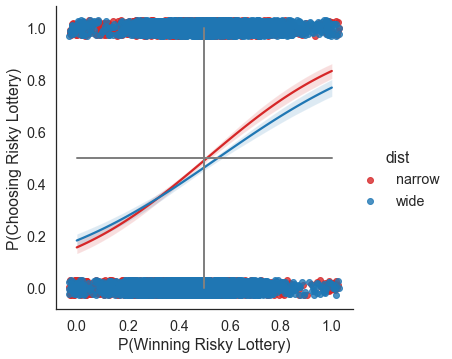

In [20]:
sns.set(font_scale=1.3)
plt_df=model_df.copy()
with sns.axes_style("white"):
    ax=sns.lmplot(x='per',y='choose_risk',hue='dist',hue_order=['narrow','wide'],
                  palette=["tab:red","tab:blue"],x_jitter=0.03,y_jitter=0.03,data=plt_df,logistic=True)
#plt.legend(labels = ['Narrow','Wide'],title='Distribution',loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)
ax.set_xlabels('P(Winning Risky Lottery)')
ax.set_ylabels('P(Choosing Risky Lottery)')
plt.plot([0,1], [0.5,0.5], linewidth=2,color='grey')
plt.plot([.50,.50], [0,1], linewidth=2,color='grey')
#plt.savefig('Figures/H1A_online.svg')


## Hypothesis 1c ( DISTRIBUTION EFFECT)

In [21]:

model_df=amb_df[(amb_df['full_A']==True)&(amb_df['sub'].isin(subs))].reset_index(drop=True)
model_w=model_df[model_df['dist'].isin(['wide'])]
model_n=model_df[model_df['dist'].isin(['narrow'])]

model_w = Lmer("choose_risk  ~ per+ (1+per|sub)",
             data=model_w, family = 'binomial')

model_w.fit()
model_n = Lmer("choose_risk  ~ per+ (1+per|sub)",
             data=model_n, family = 'binomial')

model_n.fit()

Formula: choose_risk~per+(1+per|sub)

Family: binomial	 Inference: parametric

Number of observations: 4117	 Groups: {'sub': 275.0}

Log-likelihood: -2439.219 	 AIC: 4888.438

Random effects:

            Name       Var     Std
sub  (Intercept)   276.497  16.628
sub          per  1019.668  31.932

             IV1  IV2   Corr
sub  (Intercept)  per -0.956

Fixed effects:

Formula: choose_risk~per+(1+per|sub)

Family: binomial	 Inference: parametric

Number of observations: 4125	 Groups: {'sub': 275.0}

Log-likelihood: -2329.638 	 AIC: 4669.276

Random effects:

            Name       Var     Std
sub  (Intercept)   388.235  19.704
sub          per  1445.425  38.019

             IV1  IV2   Corr
sub  (Intercept)  per -0.979

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-26.526,-30.318,-22.733,1.935,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-13.709,0.0,***
per,56.955,49.184,64.726,3.965,5.436054e+24,2.293330e+21,1.288550e+28,1.0,1.0,1.0,14.365,0.0,***


In [ ]:
model_wFE=model_w.fixef.copy()
model_wFE.reset_index(inplace=True)
model_wFE=model_wFE.rename(columns={'index':'sub'})
model_nFE=model_n.fixef.copy()
model_nFE.reset_index(inplace=True)
model_nFE=model_nFE.rename(columns={'index':'sub'})
Med1_df=[]
for sub in model_df['sub'].unique():
    tmp=sub_df[sub_df['sub']==sub]
    for dist in ['narrow','wide']:
        if dist=='narrow':
            SD_N=tmp[tmp['dist']=='narrow']['stds'].values[0]
            Mean_N=tmp[tmp['dist']=='narrow']['means'].values[0]
            Int=model_nFE[model_nFE['sub']==sub]['(Intercept)'].values[0]
            ME_per=model_nFE[model_nFE['sub']==sub]['per'].values[0]
            Med1_df.append([sub,'narrow',SD_N,Mean_N,Int,ME_per])
            
        if dist=='wide':
            SD_W=tmp[tmp['dist']=='wide']['stds'].values[0]
            Mean_W=tmp[tmp['dist']=='wide']['means'].values[0]
            Int=model_wFE[model_wFE['sub']==sub]['(Intercept)'].values[0]
            ME_per=model_wFE[model_wFE['sub']==sub]['per'].values[0]
            Med1_df.append([sub,'wide',SD_W,Mean_W,Int,ME_per])    
    
                                           
Med1_df=pd.DataFrame(columns=['sub','dist','SD','MEAN','Intercept','ME_Per'],
                    data=Med1_df)
Med1_df['dist']=Med1_df['dist']=='narrow'
Med1_df['dist']=Med1_df['dist'].astype(int)

In [ ]:
from pingouin import mediation_analysis
Med1_df['EP']=np.divide(np.negative(Med1_df['Intercept']),Med1_df['ME_Per'])
display(Med1_df)
mediation_analysis(data=Med1_df, x='dist', m=['SD'], y='EP',alpha=0.05,seed=42)

In [ ]:
plt_df=Med1_df.groupby(by='sub').diff().dropna()

In [ ]:
plt_df=Med1_df.groupby(by='sub').diff().dropna()
with sns.axes_style("darkgrid"):
    ax=sns.lmplot(data=plt_df,x='SD',y='EP',hue_order=[1,0])
#plt.legend(labels = ['Narrow','Wide'],title='Distribution',loc='upper center', bbox_to_anchor=(0.5, 1.05),
          #ncol=2, fancybox=True, shadow=True)
ax.set(ylim=(-1,0.5))
ax.set_xlabels('Standard Deviation of Belief')
ax.set_ylabels('Risky Equivalent to Hidden Lottery')
#plt.plot([0,50], [0.5,0.5], linewidth=5,color='black')
plt.savefig('Figures/H1C_online.svg')

# Hypothesis 1B:
- During the ambiguous decision task, participants will be more averse to high variance lotteries if, during the risky decision task they learned about the high variance distribution after the low variance distribution. 
- Choice ~ Probability + Order [ wide before or after narrow] 

In [ ]:
amb_df=[]
for sub in sub_df['sub'].unique():
        amb=pd.read_csv('../bids/%s/%s_task-amb_run-1_events.tsv'%(sub,sub),sep='\t')
        amb['sub']=sub
        amb['order']=sub_df[sub_df['sub']==sub]['narrow_first'].values[0]
        #print(amb['order'])
        amb_df.append(amb)
amb_df=pd.concat(amb_df)
print("no NA values for choice ",amb_df['choice'].unique())
amb_df['choose_risk']=amb_df['choice']=='risk'
print("no NA values for Amb ",amb_df['Amb'].unique())
amb_df['full_A']=amb_df['Amb']=='[0,1]'
print("no NA values for dist ",amb_df['dist'].unique())
amb_df['wide_dist']=amb_df['dist']=='wide'
print("no NA values for order ",amb_df['order'].unique())

amb_df.head()

print(len(amb_df)/300)

In [ ]:
from pymer4.models import Lmer
model_df=amb_df[amb_df['full_A']==True].reset_index(drop=True)
model_df=model_df[model_df['dist'].isin(['wide'])]

model_df['order']=model_df['order']>0
model_df['order']=model_df['order'].astype(int)

model = Lmer("choose_risk  ~ per+order  + (1|sub)",
             data=model_df, family = 'binomial')

display(model.fit(robust='hcl'))


In [ ]:
model.plot_summary()


In [ ]:
display(model_df)
model_df['dist'].unique()

In [ ]:
sns.set(font_scale=1.3)
#colors=[plt.cm.tab20c(4),plt.cm.tab20(2)]
with sns.axes_style("white"):
    ax=sns.lmplot(x='per',y='choose_risk',hue='order',hue_order=[0,1],x_jitter=0.05,y_jitter=0.01,
                  data=model_df,logistic=True,palette=['tab:red','tab:blue'])
#plt.legend(labels = ['Narrow First','Narrow Second'],title='Distribution',loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)
ax.set_xlabels('P(Winning Risky Lottery)')
ax.set_ylabels('P(Choosing Risky Lottery)')
plt.plot([0,1], [0.5,0.5], linewidth=2,color='grey')
plt.plot([.50,.50], [0,1], linewidth=2,color='grey')

In [ ]:
from scipy.stats import chisquare
model_df['per:order']=model_df['per']*model_df['order']
y_pred=(model.predict(model_df)>0.5)
y_true=model_df['choose_risk'].values
chisquare([np.sum([a == p for a,p in zip(y_pred,y_true)]),
           np.sum([a != p for a,p in zip(y_pred,y_true)])])

In [ ]:
y_pred=model.predict(model_df)
y_true=model_df['choose_risk'].values

def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)
efron_rsquare(y_true,y_pred)

## Mediate Order Effect

In [ ]:
model_df1=amb_df[(amb_df['full_A']==True)&(amb_df['dist']=='wide')].reset_index(drop=True)

model = Lmer("choose_risk  ~ per+ (1+per|sub)",
             data=model_df1, family = 'binomial')
model.fit()

In [ ]:
model1_FE=model.fixef.copy()
model1_FE.reset_index(inplace=True)
model1_FE=model1_FE.rename(columns={'index':'sub'})
Med1_df=[]
for sub in model_df1['sub'].unique():
    tmp=sub_df[sub_df['sub']==sub].copy()
    sd_wide=tmp[tmp['dist']=='wide']['stds'].values[0]
    
    mean_wide=tmp[tmp['dist']=='wide']['means'].values[0]
    order=tmp['narrow_first'].values[0]>0
    Int=model1_FE[model1_FE['sub']==sub]['(Intercept)'].values[0]
    ME_per=model1_FE[model1_FE['sub']==sub]['per'].values[0]
    Med1_df.append([sub,order,sd_wide,mean_wide,Int,ME_per])
                                           
Med1_df=pd.DataFrame(columns=['sub','order','SD','Mean','Intercept','ME_Per'],
                    data=Med1_df)
Med1_df['order']=Med1_df['order'].astype(int)


In [ ]:
Med1_df

In [ ]:
Med1_df['EP']=np.divide(np.negative(Med1_df['Intercept'])
                        ,Med1_df['ME_Per'])
display(Med1_df.head())
mediation_analysis(data=Med1_df, x='order',
                   m=['SD'], y='EP', alpha=0.05,seed=42)

In [ ]:
display(Med1_df)
sns.lmplot(x='SD_diff',y='Intercept',data=Med1_df)

In [ ]:
from pingouin import mediation_analysis


In [ ]:
plt_df

In [ ]:
#['sub-59c86f966a287600011c393e','sub-6109dc13ff3d4be24267e74d','sub-5c872cded9fe700001024123','']
for sub in sub_df['sub'].unique():
    print(sub)
    plt_df=amb_df[amb_df['sub']==sub]
    plt_df[plt_df['dist'].isin(['narrow','wide'])]
    ax=sns.lmplot(x='per',y='choose_risk',hue='dist',data=plt_df,hue_order=['narrow','wide'])
    plt.legend(labels = ['Narrow','Wide'],title='Distribution',loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=True)
    ax.set_xlabels('P(Winning Risky Lottery)')
    ax.set_ylabels('P(Choosing Risky Lottery)')
    ax.axes[0][0].set_xlim(.1, .90)
    ax.axes[0][0].set_ylim(-.2, 1)
    ax.axes[0][0].plot([0,1],[.5,.5],linewidth=2,color='grey')
    ax.axes[0][0].plot([.5,.5],[0,1],linewidth=2,color='grey')
    plt.show()